In [65]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import sys
import os
from tqdm import tqdm

# Add the project root
sys.path.append(os.path.abspath('../../'))

from src.useful_functions import read_dirs_paths
from src.mokito.modules import *

# For matplotlib
font = {'size'   : 10}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches

# Read directory paths
read_dirs_paths('dir_paths.txt', globals())

Created variables:
inp_dir = input/
out_trajectories1 = output/trajectories/
out_trajectories2 = output/trajectories/openmm_files/
out_trajectories3 = output/trajectories/openmm_files/initial_states/
out_trajectories4 = output/trajectories/openmm_files/final_states/
out_isokann = output/isokann/
out_mokito = output/mokito/


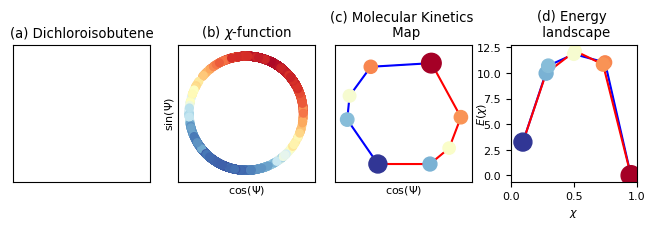

In [67]:
R   = np.loadtxt(out_trajectories1 +"R0.txt")     #  R0.shape = (Npoints,)
chi = np.load(out_isokann  +"chi0.npy")   #  chi0.shape = (Npoints,)


with open(out_mokito + "rel_coords_MKM.npy", 'rb') as f2:
    chi_nodes = np.load(f2)
    nodes_size = np.load(f2)
    R_nodes   = np.load(f2)


with open(out_mokito + "energy_MKM.npy", 'rb') as f1:
    A = np.load(f1)
    chi_nodes = np.load(f1)
    energy = np.load(f1)
    nodes_size = np.load(f1)

G = nx.read_gml(out_mokito + "MKM.gml")


font = {'size'   : 8}
plt.rc('font', **font)
in2cm = 1/2.54  # centimeters in inches


fig, ax = plt.subplots(1, 4, figsize=(16*in2cm, 6*in2cm), facecolor='white')

ax[0].set_title('(a) Dichloroisobutene')

ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].axis('square')

####################################
ax[1].scatter(np.cos(R), np.sin(R), c = chi,  cmap = cm.RdYlBu_r , s = 30 )

ax[1].set_title('(b) $\chi$-function')

ax[1].axis('square')
ax[1].set_ylim(-1.2,1.2)
ax[1].set_xlim(-1.2,1.2)
ax[1].set_xlabel(r'$\cos(\Psi)$',labelpad=1)
ax[1].set_ylabel(r'$\sin(\Psi)$',labelpad=1)

ax[1].set_yticks([])
ax[1].set_xticks([])
##################
from matplotlib.patches import FancyArrowPatch

#A= nx.adjacency_matrix(G).todense()

psi = np.linspace(-np.pi, np.pi, 100)
#ax[2].plot(np.cos(psi), np.sin(psi), 'g--',zorder=-1)
ax[2].scatter( np.cos(R_nodes), np.sin(R_nodes), s = 0.5*nodes_size, c = chi_nodes, cmap = cm.RdYlBu_r)

for i in range(len(R_nodes)):
    for j in range(i+1,len(R_nodes)):
        if A[i,j]>0:
            ax[2].plot( [np.cos(R_nodes[i]), np.cos(R_nodes[j])], [np.sin(R_nodes[i]), np.sin(R_nodes[j])], 'k-', linewidth = 0.5,zorder=-1)

ax[2].axis('square')

ax[2].set_ylim(-1.2,1.2)
ax[2].set_xlim(-1.2,1.2)
ax[2].set_yticks([])
ax[2].set_xticks([])

#ax3.set_yticks(np.linspace(int(0), int(np.max(Rt)), 5))
ax[2].set_title('(c) Molecular Kinetics \n Map')
ax[2].set_xlabel(r'$\cos(\Psi)$',labelpad=1)
#ax[2].set_ylabel(r'$\sin(\Psi)$')






ax[3].scatter(chi_nodes, energy,  s = 0.5*nodes_size, c = chi_nodes, cmap = cm.RdYlBu_r,zorder=0)

for i in range(G.number_of_nodes()):
    for j in range(i+1,G.number_of_nodes()):
        if A[i,j]>0:
            ax[3].plot([chi_nodes[i], chi_nodes[j]], [energy[i], energy[j]], 'k-', linewidth = 0.5,zorder=-1) 
            #arrow = FancyArrowPatch((X_nodes[i,0],  X_nodes[i,1]), (X_nodes[j,0], X_nodes[j,1]), zorder=-1)
            #ax[2].add_patch(arrow)

path = [0,2,4,5,7]
ax[2].plot(np.cos(R_nodes[path]), np.sin(R_nodes[path]), 'b', linewidth = 1.5,zorder=-1)
ax[3].plot(chi_nodes[path], energy[path], 'b', linewidth = 1.5,zorder=-1)

path = [7,6,3, 1, 0]
ax[2].plot(np.cos(R_nodes[path]), np.sin(R_nodes[path]), 'r', linewidth = 1.5,zorder=-1)
ax[3].plot(chi_nodes[path], energy[path], 'r', linewidth = 1.5,zorder=-1)


ax[3].set_xlabel(r'$\chi$')
ax[3].set_ylabel(r'$E(\chi)$',labelpad=-9)
ax[3].set_title('(d) Energy \n landscape')

ax[3].set_xticks([0,0.5,1])



#ax[3].set_position([0.83, 0.295, 0.20, 0.62])

plt.subplots_adjust(left=0, bottom=0.0, right=1, top=0.99, wspace=0.2, hspace=0.0)
ax[2].set_position([0.33, 0.205, 0.58, 0.58])

ax[3].set_position([0.79, 0.205, 0.20, 0.58])

#fig.savefig(out_figs + "fig2.png", format='png', dpi=300, bbox_inches='tight')
